In [129]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.15.0'

In [130]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [131]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
len(network.layers)

22

# Loading and pre-processing the images

## Content image

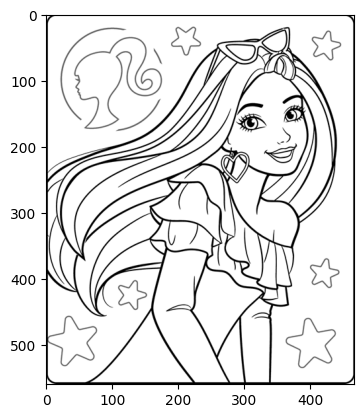

In [133]:
import cv2 
import pandas as pd
content_image = cv2.imread('/kaggle/input/style-cnn-dataset/coloring_girl.png')  
plt.imshow(content_image)
plt.show()

In [134]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (560, 467, 3), 0, 255)

In [135]:
content_image = content_image / 255
content_image.min(), content_image.max()

(0.0, 1.0)

In [136]:
content_image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [137]:
content_image = content_image[tf.newaxis, :]
content_image.shape

(1, 560, 467, 3)

## Style image

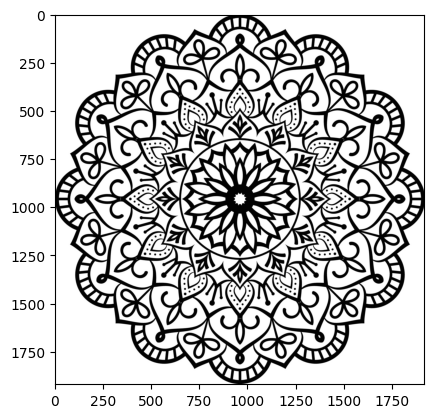

In [171]:
style_image = cv2.imread('/kaggle/input/rangoli-style/rangoli.jpg')
plt.imshow(style_image)
plt.show()

In [172]:
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

(1, 1920, 1920, 3)

# Building the neural network

In [173]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [174]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
print(num_content_layers, num_style_layers)

1 5


In [175]:
[network.get_layer(name).output for name in style_layers]

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_177>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_180>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_183>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_188>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_193>]

In [176]:
network.input

<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=None, name=keras_tensor_176>

In [177]:
def vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

    return network

In [178]:
style_extractor = vgg_layers(style_layers)
style_extractor.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [179]:
style_extractor.outputs

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_243>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_246>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_249>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_254>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_259>]

In [180]:
style_outputs = style_extractor(style_image)
len(style_outputs)

5

In [181]:
style_outputs[1]

<tf.Tensor: shape=(1, 960, 960, 128), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        , ...,  9.505705  ,
           0.        , 15.501386  ],
         [ 0.        ,  0.        ,  2.7516856 , ...,  3.6620042 ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  2.0938296 , ...,  6.2033243 ,
           0.        ,  1.8057328 ],
         ...,
         [ 0.        ,  0.        ,  2.0938296 , ...,  6.2033243 ,
           0.        ,  1.8057328 ],
         [ 0.        ,  0.        ,  1.7998657 , ...,  7.609986  ,
           0.        ,  4.051388  ],
         [ 0.        ,  0.        ,  9.764197  , ..., 16.58595   ,
           0.        ,  0.        ]],

        [[ 0.        ,  6.955045  ,  0.        , ...,  7.5917706 ,
           2.560538  , 14.670225  ],
         [ 0.        ,  7.9690466 ,  0.        , ...,  0.        ,
           3.9654176 ,  0.        ],
         [ 0.        ,  7.677038  ,  0.        , ...,  2.9461644 ,
           4.3990617 ,  0

In [182]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape

(TensorShape([1, 1920, 1920, 64]),
 TensorShape([1, 960, 960, 128]),
 TensorShape([1, 480, 480, 256]),
 TensorShape([1, 240, 240, 512]),
 TensorShape([1, 120, 120, 512]))

In [183]:
def gram_matrix(layer_activation):
    result = tf.linalg.einsum('bijc,bijd->bcd', layer_activation, layer_activation)
    input_shape = tf.shape(layer_activation)
    num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)

    return result / num_locations

In [184]:
style_outputs[0]

<tf.Tensor: shape=(1, 1920, 1920, 64), dtype=float32, numpy=
array([[[[0.        , 0.29125345, 0.20434734, ..., 0.04168189,
          0.7106071 , 0.23109871],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         ...,
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.        , 0.46357232, 0.6799367 , ..., 0.        ,
          2.2285542 , 1.7026076 ],
         [0.7655413 , 0.57919466, 1.0675534 , ..., 0.15326566,
          3.3392513 , 3.227657  ]],

        [[0.        , 0.34103358, 0.03216061, ..., 0.        ,
          0.        , 0.        ],
         [0.72687244, 0.55834335, 0.5916322 , ..., 0.        ,
          0.49078763, 0.7324457 ],
         [0.72687244, 0.55834335, 0.5916322 , ..., 0.        ,
          0.49078763, 0.7324457 ],
         ...,
         [0.72687244, 0.558

In [185]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.7303884 , 0.3245209 , 0.3536579 , ..., 0.19365937,
         0.4121709 , 0.56294566],
        [0.3245209 , 0.22210056, 0.2377473 , ..., 0.01930281,
         0.2236413 , 0.31678495],
        [0.3536579 , 0.2377473 , 0.257696  , ..., 0.01193541,
         0.24545693, 0.3482601 ],
        ...,
        [0.19365937, 0.01930281, 0.01193541, ..., 0.26716548,
         0.12489098, 0.10659   ],
        [0.4121709 , 0.2236413 , 0.24545693, ..., 0.12489098,
         0.33919153, 0.4062382 ],
        [0.56294566, 0.31678495, 0.3482601 , ..., 0.10659   ,
         0.4062382 , 0.53293735]]], dtype=float32)>

In [186]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    inputs = inputs * 255.0
    # 0 - 1
    # -127.50 - 127.50
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs = outputs[:self.num_style_layers]
    content_outputs = outputs[self.num_style_layers:]

    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
    style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [187]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [188]:
extractor = StyleContentModel(style_layers, content_layers)

In [189]:
results = extractor(content_image)
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 70, 58, 512), dtype=float32, numpy=
  array([[[[1665.0604  , 2704.385   ,    0.      , ..., 1435.8282  ,
               0.      , 3512.5183  ],
           [   0.      , 5462.8237  ,    0.      , ...,    0.      ,
               0.      , 2890.3518  ],
           [   0.      , 6011.2954  ,    0.      , ...,    0.      ,
            1614.7692  ,  661.1573  ],
           ...,
           [   0.      , 5499.8955  ,  680.7947  , ...,    0.      ,
             101.37163 ,    0.      ],
           [   0.      , 5767.225   , 1104.8994  , ...,    0.      ,
               0.      , 2143.5005  ],
           [   0.      , 2835.2878  ,    0.      , ...,  123.46824 ,
               0.      , 2848.9285  ]],
  
          [[ 416.39645 ,    0.      ,    0.      , ..., 2569.503   ,
               0.      , 3832.923   ],
           [   0.      ,  763.9628  ,    0.      , ...,  271.5521  ,
               0.      , 5911.4175  ],
           [   0.      , 2303

In [190]:
for key, value in results.items():
    print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [191]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [192]:
len(style_targets), len(content_targets)

(5, 1)

In [193]:
new_image = tf.Variable(content_image)

In [194]:
content_weight = 1
style_weight = 100

In [195]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [196]:
expected_output = np.array([10000, 15000])
predictions = np.array([8000, 15900])

In [197]:
np.sum(abs(expected_output - predictions)) / 2

1450.0

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(expected_output, predictions)

1450.0

In [199]:
mean_squared_error(expected_output, predictions)

2405000.0

In [200]:
((expected_output - predictions) ** 2).mean()

2405000.0

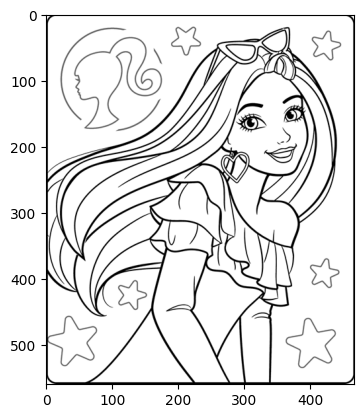

In [201]:
plt.imshow(tf.squeeze(content_image, axis = 0));

Epoch 250 | content loss: 277349.03125 | style loss: 126485291008.0 | total loss 2529706115072.0


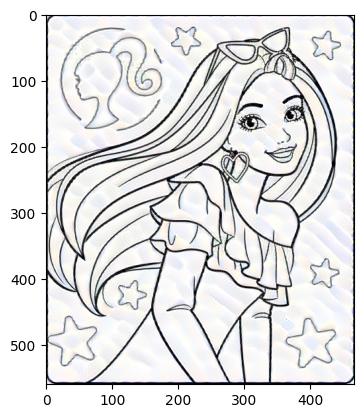

Epoch 500 | content loss: 377115.46875 | style loss: 79344730112.0 | total loss 1586894995456.0


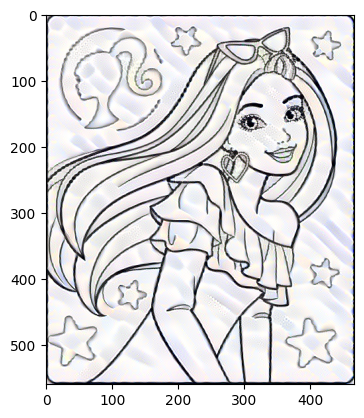

Epoch 750 | content loss: 426517.8125 | style loss: 59130331136.0 | total loss 1182607081472.0


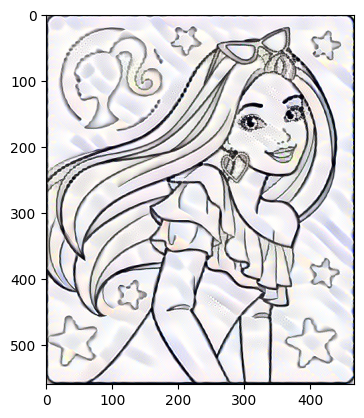

Epoch 1000 | content loss: 454418.5625 | style loss: 47424012288.0 | total loss 948480638976.0


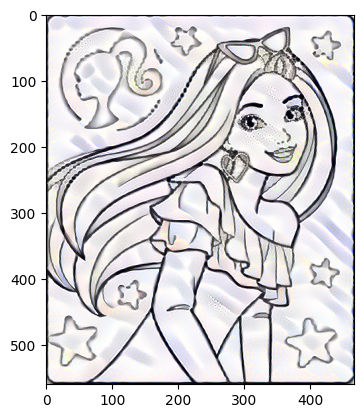

Epoch 1250 | content loss: 473991.84375 | style loss: 39292747776.0 | total loss 785855414272.0


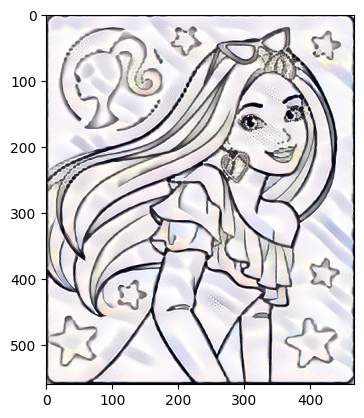

Epoch 1500 | content loss: 490124.5625 | style loss: 33039378432.0 | total loss 660788019200.0


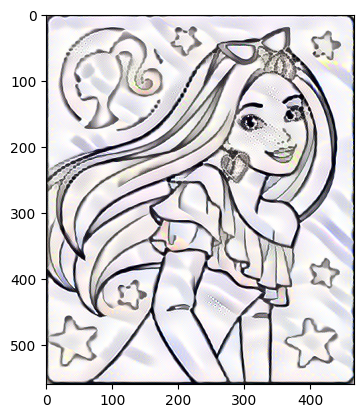

Epoch 1750 | content loss: 504285.09375 | style loss: 27959715840.0 | total loss 559194832896.0


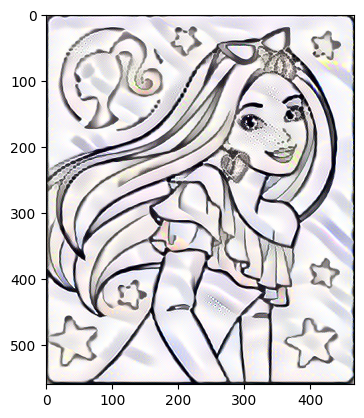

Epoch 2000 | content loss: 516920.65625 | style loss: 23775033344.0 | total loss 475501166592.0


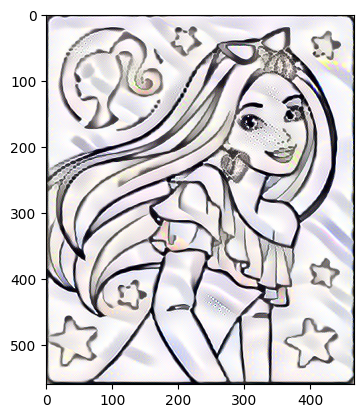

Epoch 2250 | content loss: 528239.125 | style loss: 20414240768.0 | total loss 408285347840.0


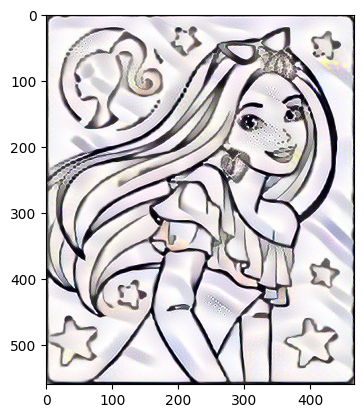

Epoch 2500 | content loss: 537972.5 | style loss: 17926717440.0 | total loss 358534873088.0


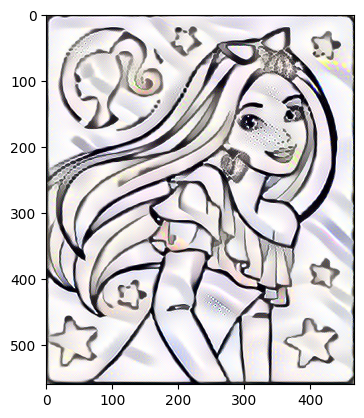

Epoch 2750 | content loss: 546823.0 | style loss: 15929031680.0 | total loss 318581211136.0


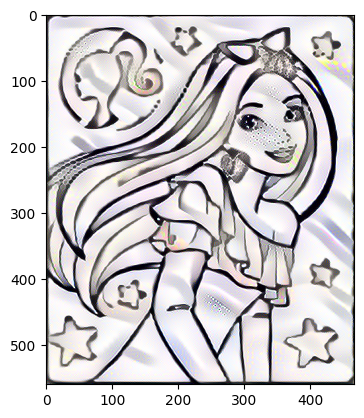

Epoch 3000 | content loss: 555691.875 | style loss: 14178869248.0 | total loss 283577942016.0


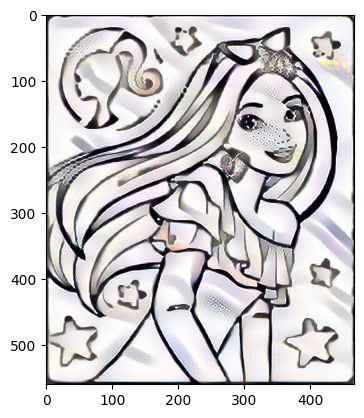

In [202]:
epochs = 3000
print_every = 250

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

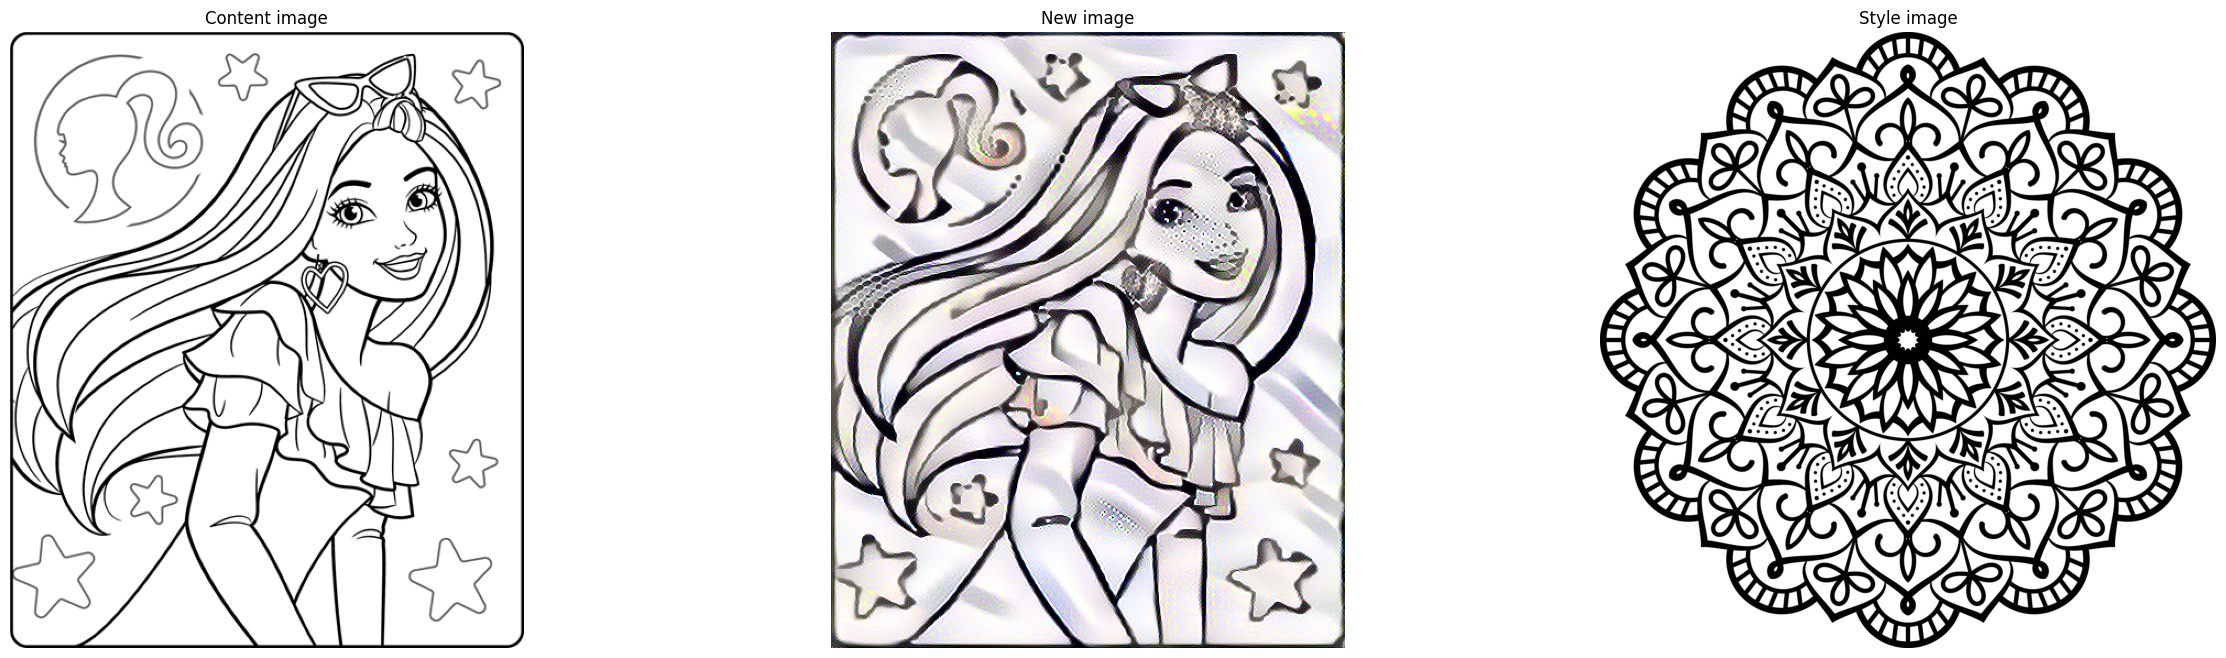

In [203]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.axis('off')
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.axis('off')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.axis('off')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image');